In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans

In [2]:
data = pd.read_csv('Mall_Customers.csv', index_col=0)

data.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


In [3]:
data.drop('Gender', axis=1, inplace=True)
data.drop('Age', axis=1, inplace=True)

data.head()

,Annual Income (k$),Spending Score (1-100)
CustomerID,,
1,15,39
2,15,81
3,16,6
4,16,77
5,17,40


In [4]:
data = data.sample(frac=1)

In [7]:
k_means = KMeans(n_clusters=2)
k_means.fit(data)

KMeans(n_clusters=2)

In [8]:
k_means.labels_

array([1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 0], dtype=int32)

In [10]:
centers = k_means.cluster_centers_

centers

array([[37.28888889, 50.28888889],
       [79.6       , 50.12727273]])

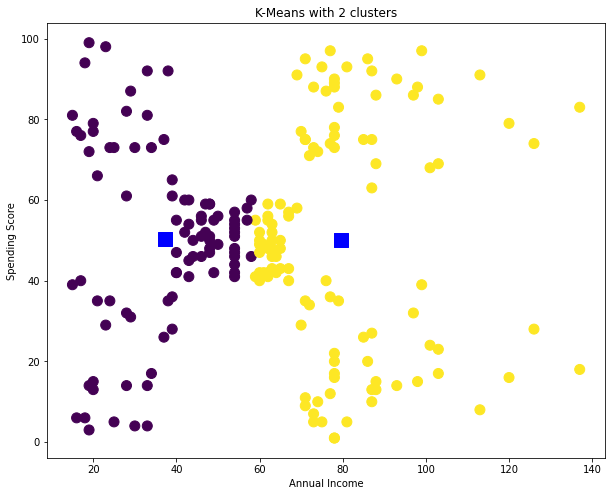

In [11]:
plt.figure(figsize = (10,8))

plt.scatter(data['Annual Income (k$)'],
            data['Spending Score (1-100)'], 
            c=k_means.labels_, s=100)
plt.scatter(centers[:,0], centers[:,1], color='blue', marker='s', s=200) 

plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.title('K-Means with 2 clusters')

plt.show()

In [12]:
# Silhoutte score measures how similar a point is to other points in its own cluster and how different it is from points in other clusters
from sklearn.metrics import silhouette_score

score = silhouette_score (data, k_means.labels_)

print("Score = ", score)

Score =  0.29689691625030085


In [13]:
k_means = KMeans(n_clusters=5)
k_means.fit(data)

KMeans(n_clusters=5)

In [14]:
np.unique(k_means.labels_)

array([0, 1, 2, 3, 4], dtype=int32)

In [15]:
centers = k_means.cluster_centers_

centers

array([[86.53846154, 82.12820513],
       [55.2962963 , 49.51851852],
       [88.2       , 17.11428571],
       [26.30434783, 20.91304348],
       [25.72727273, 79.36363636]])

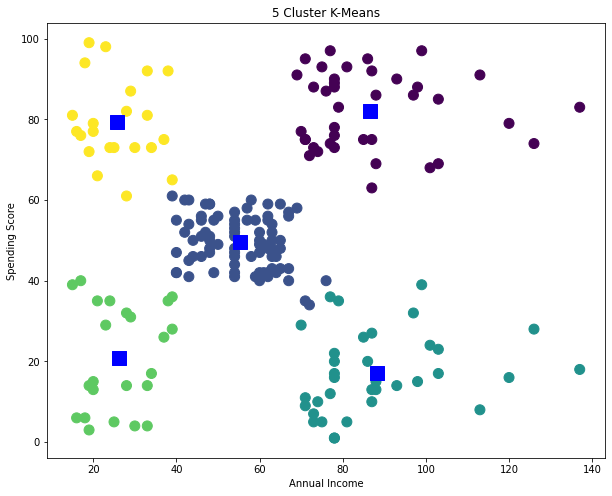

In [16]:
plt.figure(figsize=(10, 8))

plt.scatter(data['Annual Income (k$)'], 
            data['Spending Score (1-100)'], 
            c=k_means.labels_, s=100)

plt.scatter(centers[:,0], centers[:,1], color='blue', marker='s', s=200) 

plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.title('5 Cluster K-Means')

plt.show()

In [17]:
score = silhouette_score(data, k_means.labels_)

print("Score = ", score)

Score =  0.553931997444648
